In [1]:
# IMPORTAMOS LIBRERIAS Y MODULOS QUE VAMOS A UTILIZAR
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np

In [2]:
# PARA BAJAR AUTOMATICAMENTE EL DATASET PARA SER USADO
file_name = 'dataR2.csv'
def download_file(file_name):
    print('Descargando el dataset')
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv'
    urllib.request.urlretrieve(url, file_name)
download_file(file_name)

Descargando el dataset


In [3]:
# Cargaremos los datos y los dividimos en conjuntos para entrenar y testear.
data = pd.read_csv(file_name)
y = data["Classification"]
X = data.drop(["Classification"], axis=1)
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     stratify=y,
                                     test_size=0.33,
                                     random_state=11)

In [4]:
# PARA VER COMO ESTAN COMPUESTO LOS DATOS.  el dataset se compone de 10 columnas. 9 corresponden a variables independientes,
# que usaremos para predecir el target y 1 (Classification) es la variable a predecir. Todas las variables son numéricas, ya 
# sea enteras o reales y no tiene valores nulos.
data.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


## ARBOL DE DECISION

In [5]:
# Primero creamos un arbol de decisión para ver la precisión y poder compararla
tree = DecisionTreeClassifier(max_depth=2, random_state=11) # Max depth acorta el arbol si no salia muy grande.
tree.fit(X_train, y_train)
print(f"La precisión del Arbol de decisión es de: {tree.score(X_test, y_test)}")

La precisión del Arbol de decisión es de: 0.6410256410256411


In [6]:
from sklearn.tree import plot_tree # Importamos para graficar el arbol de decisión.
import matplotlib.pyplot as plt # Para manejar el tamaño del grafico del arbol.

### A) Visualizando el modelo

<Figure size 1440x720 with 0 Axes>

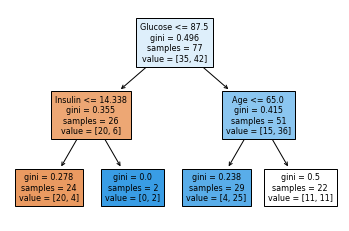

<Figure size 1440x720 with 0 Axes>

In [7]:
plot_tree(decision_tree=tree, feature_names=X_train.columns, filled=True, fontsize=8); # Feature=nombre de columnas, Filled=Para colorear el arbol, el punto y coma al final es para que no salga todo el texto del arbol de decision y solo el grafico
plt.figure(figsize=(20,10))

### B) Calculando predicciones

In [14]:
a = data.sample() # Tomamos un valor aleatorio para predecir y ver como se comporta un arbol de decisión.
a

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
54,49,20.956608,94,12.305,2.853119,11.2406,8.412175,23.1177,573.63,2


In [15]:
# Con el valor que nos de aleatorio buscamos dentro del arbol que vaya cumpliendo los datos, luego al llegar mas abajo nos
# quedara en un cuadrado de abajo, donde dice "samples" es la cantidad de personas que cumplen las mismas caracteristicas.
# En el ejemplo tenemos que es el valor 85. nos da Samples = 2 y tenemos un total de 116 filas. En value tenemos [0,2] que nos
# dice que 0 no cumplieron, 2 cumplieron, entonces dividimos 2 cumplieron/2 samples=100% probabilidad

# Esa seria la forma de calculo, pero para pedirlo que se calcule seria asi...
tree.predict_proba(a)


c:\users\nestor\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Classification
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 10 features, but DecisionTreeClassifier is expecting 9 features as input.

## RANDOM FOREST

In [ ]:
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)
print(f"La precisión del Random Forest es: {model.score(X_test, y_test)}")

In [ ]:
classifier=model.fit(X_train, y_train)#Construimos el modelo sobre los datos de entrenamiento

In [ ]:
predictions=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Matriz de confusión")
print(confusion_matrix(y_test,predictions))
print("Métricas de clasificación")
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

In [ ]:
predictions

In [ ]:
classifier